# QSOs FITS

Import necessary libraries 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd 
import os
from urllib import request
import ssl
from astropy.io import fits



Function to download data from a txt file with links 

In [10]:
file = "Todos_Fits.txt"

def Download_data(file,n):
    files = "FITS_data"
    f = open(file,"r")
    ssl._create_default_https_context = ssl._create_unverified_context
    
    try:
        os.mkdir(files)
    except OSError:
        print("Creation of the directory %s already was done" % files)
    else:
        print ("Successfully created the directory %s" % files)
    k = 0
    for i in f.readlines()[1822:n]:
        k += 1
        print(i[-26:-1],k)
        request.urlretrieve(i, files+"/"+i[-26:-1])


Download_data(file,2102)

Save data the plot data and make a few plots

In [9]:
datadir = "FITS_data/"
I = []
for i in range(len(os.listdir(datadir))):
    I.append(fits.open(datadir+os.listdir(datadir)[i]))


X = [];Y = [];titles =[]

for img in range(len(os.listdir(datadir))):
    X.append(np.array([I[img][1].data[i][1] for i in range(len(I[img][1].data))]))
    Y.append(np.array([I[img][1].data[i][0] for i in range(len(I[img][1].data))]))
    titles.append(os.listdir(datadir)[img])



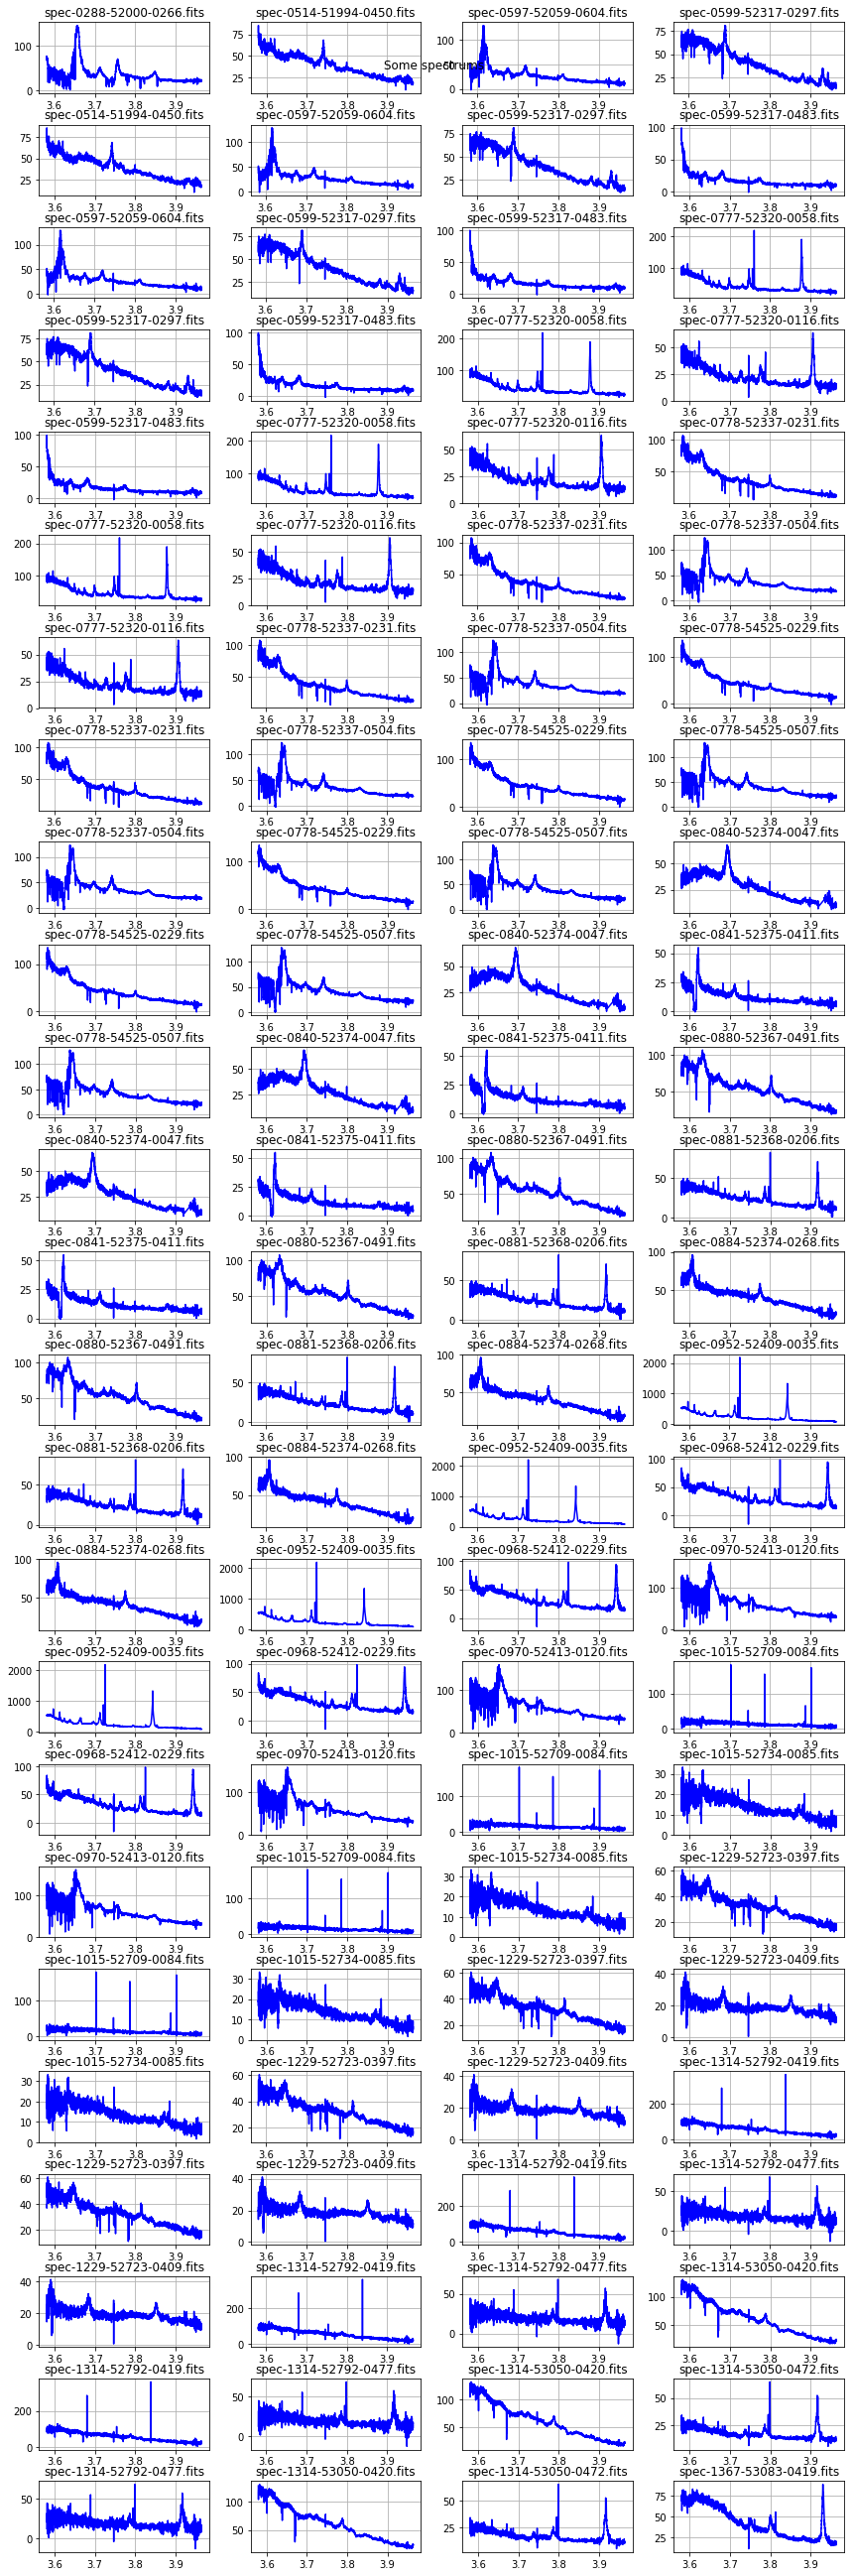

In [102]:
hα = 6563 #Amstrong 
O3 = 5007 #Amstrong 
hβ = 4861 #Amstrong

fig, ax = plt.subplots(25, 4, figsize = (12, 36))
fig.suptitle('Some spectrums')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
fig.tight_layout()
for x, y in [(i,j) for i in range(25) for j in range (4)]:
    ax[x,y].plot(X[x+y],Y[x+y],"b-")
    ax[x,y].grid(True)
    ax[x,y].set_title(titles[x+y])
    #ax[x,y].set_axvline(x=hα, color='r', linestyle='-')
    #ax[x,y].set_axvline(x=O3, color='g', linestyle='-')
    #ax[x,y].set_axvline(x=hβ, color='y', linestyle='-')


In [82]:
I[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x118e39320>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11924eba8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x118dffcf8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x11a3f2320>]

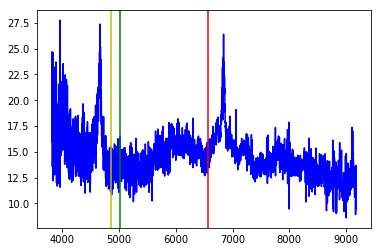

In [83]:
plt.plot(10**X[1],Y[1],"b")
hα = 6563 #Amstrong 
O3 = 5007 #Amstrong 
hβ = 4861 #Amstrong
plt.axvline(x=hα, color='r', linestyle='-')
plt.axvline(x=O3, color='g', linestyle='-')
plt.axvline(x=hβ, color='y', linestyle='-')

In [5]:
tabla = pd.read_csv("datosSDSS.csv",delimiter=",")
tabla

,plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,392,51793,240,'26','Decimal(''441418764261550080'')',8.632258,-0.220188,21.22,0.380878,0.000031,0,'QSO','BROADLINE'
1,399,51817,26,'26','Decimal(''449241240140015616'')',22.174470,-0.554768,17.08,1.658690,0.000365,0,'QSO','BROADLINE'
2,400,51820,252,'26','Decimal(''450429262504159232'')',23.188750,-0.769441,12.29,1.471480,0.000342,0,'QSO','BROADLINE'
3,418,51817,52,'26','Decimal(''470640485195606016'')',10.099026,14.135399,38.27,1.894450,0.000235,0,'QSO','BROADLINE'
4,418,51884,58,'26','Decimal(''470642135587121152'')',10.099026,14.135399,48.39,1.894520,0.000224,0,'QSO','BROADLINE'
5,419,51812,250,'26','Decimal(''471820810844137472'')',10.675032,13.913934,36.08,1.619610,0.000432,0,'QSO','BROADLINE'
6,419,51868,250,'26','Decimal(''471820811783661568'')',10.675032,13.913934,38.40,1.622810,0.000310,0,'QSO','BROADLINE'
7,419,51879,257,'26','Decimal(''471822736113559552'')',10.675032,13.913934,37.22,1.624520,0.000212,0,'QSO','BROADLINE'
8,420,51871,160,'26','Decimal(''472921972729210880'')',13.645559,14.924640,34.24,0.875128,0.000122,0,'QSO','BROADLINE'
9,421,51821,381,'26','Decimal(''474108619814627328'')',14.488525,15.353075,24.83,1.273210,0.000216,0,'QSO','BROADLINE'


### 1. Relacionar espectros con objetos dentro de la tabla "datosSDSS.csv"



In [11]:
datadir = "FITS_data/"
titles = []
for img in range(len(os.listdir(datadir))):
    titles.append([int(os.listdir(datadir)[img][-20:-16]),int(os.listdir(datadir)[img][-15:-10]),int(os.listdir(datadir)[img][-9:-5])])



In [12]:
titles

[[288, 52000, 266],
 [293, 51689, 99],
 [293, 51994, 85],
 [297, 51663, 166],
 [297, 51663, 269],
 [297, 51959, 164],
 [297, 51959, 267],
 [299, 51671, 39],
 [300, 51666, 75],
 [300, 51666, 614],
 [300, 51943, 71],
 [300, 51943, 616],
 [301, 51641, 562],
 [301, 51942, 565],
 [303, 51615, 536],
 [306, 51637, 122],
 [306, 51690, 128],
 [310, 51616, 326],
 [310, 51990, 350],
 [311, 51665, 337],
 [313, 51673, 496],
 [337, 51997, 505],
 [338, 51694, 604],
 [374, 51791, 136],
 [374, 51791, 219],
 [379, 51789, 522],
 [379, 51789, 545],
 [381, 51811, 625],
 [384, 51821, 349],
 [385, 51783, 590],
 [385, 51877, 587],
 [386, 51788, 310],
 [386, 51788, 524],
 [392, 51793, 240],
 [399, 51817, 26],
 [400, 51820, 252],
 [402, 51793, 109],
 [402, 51793, 260],
 [403, 51871, 529],
 [405, 51816, 314],
 [406, 51817, 215],
 [406, 51869, 210],
 [406, 51876, 214],
 [406, 51900, 207],
 [406, 52238, 201],
 [418, 51817, 52],
 [418, 51884, 58],
 [419, 51812, 250],
 [419, 51868, 250],
 [419, 51879, 257],
 [420, 5

In [18]:
EO = []
for count in range(len(titles)): 
    EO.append(tabla.loc[(tabla.plate == titles[count][0])&(tabla.mjd == titles[count][1]) & (tabla.fiberid == titles[count][2])])

In [33]:
EO[10]

,plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
1283,300,51943,71,'26',Decimal('337789520982337536'),207.96033,-0.127446,44.93,1.44031,0.00013,0,'QSO','BROADLINE'


In [22]:
I = []
for i in range(len(os.listdir(datadir))):
    I.append(fits.open(datadir+os.listdir(datadir)[i]))




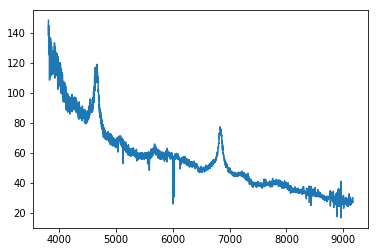

In [23]:
x = []; y = []
x.append(np.array([I[10][1].data[i][1] for i in range(len(I[0][1].data))]))
y.append(np.array([I[10][1].data[i][0] for i in range(len(I[0][1].data))]))


plt.plot(10**x[0],y[0])

In [37]:
def Lambdao(Lambda,z):
    return Lambda/(z+1)
    

In [34]:
tabla["z"][1283]

1.44031

In [127]:
"0123" == "0123"

True

In [36]:
np.arange(5)+tabla["z"][1283]

array([1.44031, 2.44031, 3.44031, 4.44031, 5.44031])

### 2. Dado el caso que a un objeto le pertenezcan dos o más espectros promediar para tener un solo espectro por objeto 

### 3. Corrimiento al rojo utiizando

$$\lambda_{o} = \frac{\lambda}{z+1}$$

$$\lambda_{o}\qquad\text{Espectro de laboratorio, el que queremos ver}$$

$$\lambda\qquad\text{Dato observado en los espectros }$$

$$z \qquad \text{Redshift}$$


### 4. Clasificar por grupos de redshift en intervalos (0.01,0.1], (0.1,1],(1,2],(2,3],(3,4],(4,5],(5,6],(6,7],(7,8] 

### 4 Incluyen las lineas de emisión

* $Mg_{2} \rightarrow 2799 A$
* $C4 \rightarrow 1549 A$
* $H_{\beta} \rightarrow 4862 A$

In [5]:
3200./(0.79+1)

1787.7094972067039